In [1]:
from HeaderP import *
import Astraea
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice
import random

/Users/lucy/anaconda3/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence
/Users/lucy/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:18: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable
/Users/lucy/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:16: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping, namedtuple, defaultdict, Sequence
/Users/lucy/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module 

# Read in Table

https://arxiv.org/pdf/1908.00345.pdf

In [2]:
BV=[1.477,1.440,1.390,1.338,1.277,1.186,1.072,0.961,0.867,0.787,0.718,
    0.661,0.609,0.564,0.523,0.484,0.448]
Masses=[0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95,1.00,
       1.05,1.10,1.15,1.20,1.25]
Ages=[0.10,0.12,0.15,0.20,0.22,0.25,0.30,0.40,0.50,0.60,0.70,1.00,1.50,
      2.00,2.50,4.00,4.57]
Prot=np.zeros((len(BV),len(Ages)))
Prot[0,:]=[9.69,9.76,10.96,14.87,15.95,17.09,18.24,19.99,21.54,22.92,
           24.18,27.20,29.87,31.13,31.89,33.36,34.40]
Prot[1,:]=[9.08,9.28,11.83,14.43,14.99,15.63,16.50,17.80,18.76,19.53,
           20.19,21.68,23.20,24.66,26.12,30.53,32.41]
Prot[2,:]=[8.40,9.92,11.54,12.43,12.76,13.24,14.00,15.30,16.18,16.69,
           17.04,17.92,19.47,21.27,23.26,29.81,32.71]
Prot[3,:]=[8.26,9.65,10.38,11.25,11.50,11.84,12.28,12.94,13.43,13.88,
           14.30,15.61,17.86,20.20,22.62,30.29,33.25]
Prot[4,:]=[8.18,8.60, 9.25, 9.97,10.16,10.39,10.71,11.22,11.68,12.15,
           12.62,14.12,16.77,19.62,22.62,31.50,34.71]
Prot[5,:]=[7.38,7.89,8.38,8.84,8.96,9.12,9.38,9.87,10.40,10.92,11.46,
           13.20,16.29,19.50,22.77,31.96,35.12]
Prot[6,:]=[6.73,7.15,7.51,7.87,7.97,8.12,8.39,8.92,9.49,10.10,10.72,
           12.69,16.13,19.55,22.86,31.74,34.66]
Prot[7,:]=[6.19,6.43,6.64,6.94,7.06,7.24,7.56,8.19,8.86,9.55,10.25,
           12.42,16.05,19.50,22.69,31.02,33.76]
Prot[8,:]=[5.65,5.79,5.98,6.29,6.41,6.61,6.95,7.66,8.39,9.14,9.90,12.18,15.85,
           19.22,22.26,30.02,32.58]
Prot[9,:]=[5.14,5.31,5.50,5.82,5.95,6.15,6.50,7.22,7.97,8.73,9.52,11.83,15.41,
           18.60,21.45,28.70,31.10]
Prot[10,:]=[4.67,4.81,5.01,5.36,5.51,5.73,6.11,6.87,7.64,8.41,9.19,11.42,14.79,
            17.75,20.40,27.15,29.39]
Prot[11,:]=[4.33,4.45,4.64,4.98,5.12,5.33,5.70,6.45,7.21,7.95,8.69,10.79,13.91,
            16.64,19.06,25.24,27.33]
Prot[12,:]=[3.99,4.10,4.29,4.62,4.75,4.96,5.31,5.99,6.69,7.36,8.02,9.91,12.70,
            15.14,17.31,22.94,24.91]
Prot[13,:]=[3.67,3.78,3.96,4.25,4.36,4.53,4.82,5.40,5.99,6.56,7.13,8.74,11.12,
            13.19,15.03,20.03,22.02]
Prot[14,:]=[3.35,3.45,3.58,3.81,3.90,4.05,4.28,4.74,5.20,5.63,6.07,7.29,9.11,10.72,
            12.19,16.68,18.78]
Prot[15,:]=[3.01,3.09,3.21,3.40,3.46,3.55,3.69,3.94,4.18,4.44,4.69,5.44,6.62,7.69,
            8.741,13.73,14.00]
Prot[16,:]=[2.76,2.77,2.78,2.82,2.83,2.86,2.89,2.97,3.04,3.11,3.18,3.35,3.58,3.94,
            4.69,10.87,11.00]


# Velocity dispersion relationship

Text(0.5, 1.0, '|z|>270')

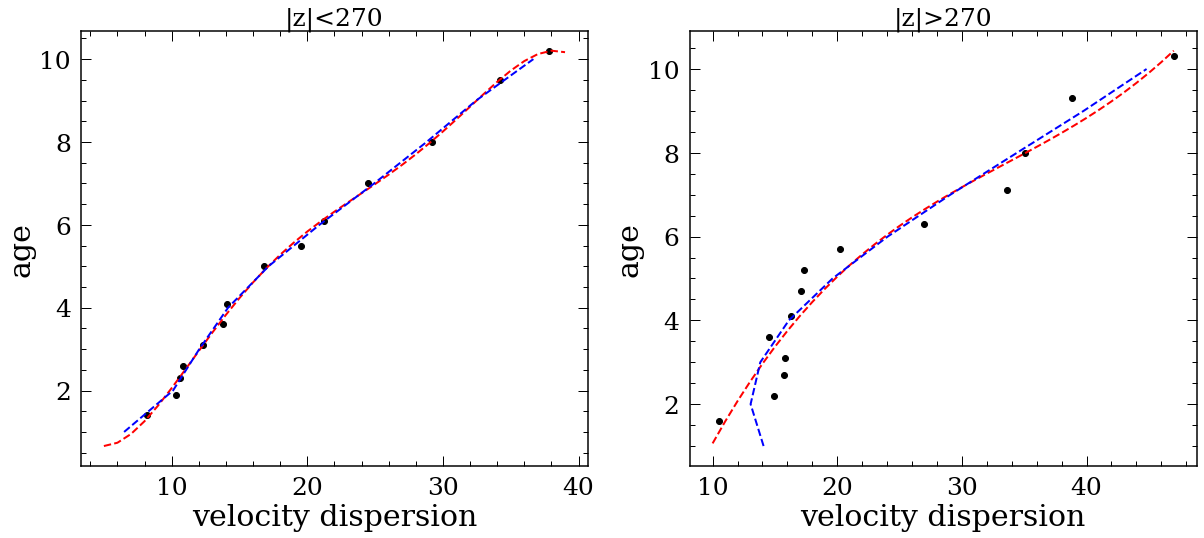

In [3]:
dv_lowz=[8.2,10.3,10.6,10.8,12.3,13.8,14.1,16.8,19.5,21.2,24.5,29.2,34.2,37.8]
age_lowz=[1.4,1.9,2.3,2.6,3.1,3.6,4.1,5.,5.5,6.1,7.0,8.,9.5,10.2]


z_lowz = np.polyfit(dv_lowz, age_lowz, 5)
z_lowz_r = np.polyfit(age_lowz,dv_lowz, 5)
p_lowz = np.poly1d(z_lowz)
p_lowz_r = np.poly1d(z_lowz_r)
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot(dv_lowz,age_lowz,'ko')
plt.plot(range(5,40),p_lowz(range(5,40)),'r--')
plt.plot(p_lowz_r(range(1,11)),range(1,11),'b--')
plt.xlabel('velocity dispersion')
plt.ylabel('age')
plt.title('|z|<270',fontsize=25)

dv_hiz=[10.5,14.9,15.7,15.8,14.5,16.3,17.1,17.3,20.2,27.,33.6,35.1,38.8,47]
age_hiz=[1.6,2.2,2.7,3.1,3.6,4.1,4.7,5.2,5.7,6.3,7.1,8.,9.3,10.3]

z_hiz = np.polyfit(dv_hiz, age_hiz, 3)
z_hiz_r = np.polyfit(age_hiz,dv_hiz, 3)
p_hiz = np.poly1d(z_hiz)
p_hiz_r = np.poly1d(z_hiz_r)
plt.subplot(1,2,2)
plt.plot(dv_hiz,age_hiz,'ko')
plt.plot(range(10,48),p_hiz(range(10,48)),'r--')
plt.plot(p_hiz_r(range(1,11)),range(1,11),'b--')
plt.xlabel('velocity dispersion')
plt.ylabel('age')
plt.title('|z|>270',fontsize=25)

# Get BV to Teff 
## For all Kepler stars
### dereddening

In [4]:
from dustmaps.config import config
config['data_dir'] = '/Users/lucy/anaconda3/lib/python3.7/site-packages/dustmaps/data/'

import dustmaps.bayestar
dustmaps.bayestar.fetch()

import dustmaps.iphas
dustmaps.iphas.fetch()

import dustmaps.marshall
dustmaps.marshall.fetch()

import dustmaps.chen2014
dustmaps.chen2014.fetch()

import dustmaps.lenz2017
dustmaps.lenz2017.fetch()

import dustmaps.pg2010
dustmaps.pg2010.fetch()

import dustmaps.leike_ensslin_2019
dustmaps.leike_ensslin_2019.fetch()

Checking existing file to see if MD5 sum matches ...
File exists. Not overwriting.
File appears to exist already. Call `fetch(clobber=True)` to force overwriting of existing file.
File appears to exist already. Call ``fetch(clobber=True)`` to force overwriting of existing file.
Checking existing file to see if MD5 sum matches ...


  0.0 B of ? |   0.0 s/B |#                             | N/A% | ETA:  --:--:--

DownloadError: The MD5 sum of the downloaded file is incorrect.
  download: 010d9e8f3221569b8f1cdbf5bbe26feb
  expected: f8a2bc46d411c57ca4c76dc344e291f1


In [5]:
from dustmaps.bayestar import BayestarQuery
bayestar = BayestarQuery(max_samples=2, version='bayestar2019')
print("Calculating Ebv")

Loading pixel_info ...
Loading samples ...
Loading best_fit ...
Replacing NaNs in reliable distance estimates ...
Sorting pixel_info ...
Extracting hp_idx_sorted and data_idx at each nside ...
  nside = 64
  nside = 128
  nside = 256
  nside = 512
  nside = 1024
t = 30.880 s
  pix_info:   0.731 s
   samples:  12.946 s
      best:   7.175 s
       nan:   0.671 s
      sort:   9.201 s
       idx:   0.156 s
Calculating Ebv


In [6]:
df=pd.read_pickle('NewData/ProtVP_MS_150_w015_bin.pkl')


In [7]:
def getDust(G, bp, rp, ebv, maxnit=100):
    """
    Compute the Gaia extinctions assuming relations from Babusieux.
    Author: Sergey Koposov skoposov@cmu.edu
    Args:
        G (float): Gaia G mag.
        bp (float): Gaia BP mag.
        rp (float): Gaia RP mag.
        ebv (float): E(B-V), extinction in B-V.
        maxnit (int): number of iterations
    Returns:
        Extinction in G,bp, rp
    """
    c1, c2, c3, c4, c5, c6, c7 = [0.9761, -0.1704,
                                  0.0086, 0.0011, -0.0438, 0.0013, 0.0099]
    d1, d2, d3, d4, d5, d6, d7 = [
        1.1517, -0.0871, -0.0333, 0.0173, -0.0230, 0.0006, 0.0043]
    e1, e2, e3, e4, e5, e6, e7 = [
        0.6104, -0.0170, -0.0026, -0.0017, -0.0078, 0.00005, 0.0006]
    A0 = 3.1*ebv
    P1 = np.poly1d([c1, c2, c3, c4][::-1])

    def F1(bprp): return np.poly1d(
        [c1, c2, c3, c4][::-1])(bprp)+c5*A0+c6*A0**2+c7*bprp*A0

    def F2(bprp): return np.poly1d(
        [d1, d2, d3, d4][::-1])(bprp)+d5*A0+d6*A0**2+d7*bprp*A0

    def F3(bprp): return np.poly1d(
        [e1, e2, e3, e4][::-1])(bprp)+e5*A0+e6*A0**2+e7*bprp*A0
    xind = np.isfinite(bp+rp+G)
    curbp = bp-rp
    for i in range(maxnit):
        AG = F1(curbp)*A0
        Abp = F2(curbp)*A0
        Arp = F3(curbp)*A0
        curbp1 = bp-rp-Abp+Arp

        delta = np.abs(curbp1-curbp)[xind]
        curbp = curbp1

    AG = F1(curbp)*A0
    Abp = F2(curbp)*A0
    Arp = F3(curbp)*A0
    return AG, Abp, Arp

In [8]:
import astropy.units as units
coords = SkyCoord(df.ra.values*units.deg, df.dec.values*units.deg,
                  distance=df.r_est.values*units.pc)
ebv, flags = bayestar(coords, mode='percentile', pct=[16., 50., 84.],
                      return_flags=True)
# Calculate Av
Av_bayestar = 2.742 * ebv
print(np.shape(Av_bayestar), "shape")
Av = Av_bayestar[:, 1]
Av_errm = Av - Av_bayestar[:, 0]
Av_errp = Av_bayestar[:, 2] - Av
Av_std = .5*(Av_errm + Av_errp)

df["ebv"] = ebv[:, 1]  # The median ebv value.
df["Av"] = Av
df["Av_errp"] = Av_errp
df["Av_errm"] = Av_errm
df["Av_std"] = Av_std

# Calculate dereddened photometry
AG, Abp, Arp = getDust(df.phot_g_mean_mag.values,
                       df.phot_bp_mean_mag.values,
                       df.phot_rp_mean_mag.values, df.ebv.values)
df["bp_dered"] = df.phot_bp_mean_mag.values - Abp
df["rp_dered"] = df.phot_rp_mean_mag.values - Arp
df["bprp_dered"] = df["bp_dered"] - df["rp_dered"]
df["G_dered"] = df.phot_g_mean_mag.values - AG

(21370, 3) shape


## Turn BV into Teff

In [9]:
import numpy as np


def bprp_to_teff(bprp):
    """
    Calculate photometric Teff from Gaia color (use dereddened color!)
    Args:
        bprp (array): Gaia G_BP colour minus Gaia G_RP colour.
    Returns:
        teffs (array): Photometric effective temperatures.
    """

    # coeffs = [8959.8112335205078, -4801.5566310882568, 1931.4756631851196,
    #         -2445.9980716705322, 2669.0248055458069, -1324.0671020746231,
    #         301.13205924630165, -25.923997443169355]

    # Jason's updated parameters:
    coeffs = [-416.585, 39780.0, -84190.5, 85203.9, -48225.9, 15598.5,
              -2694.76, 192.865]

    return np.polyval(coeffs[::-1], bprp)

In [10]:
import numpy as np


def bprp_to_teff(bprp):
    """
    Calculate photometric Teff from Gaia color (use dereddened color!)
    Args:
        bprp (array): Gaia G_BP colour minus Gaia G_RP colour.
    Returns:
        teffs (array): Photometric effective temperatures.
    """

    # coeffs = [8959.8112335205078, -4801.5566310882568, 1931.4756631851196,
    #         -2445.9980716705322, 2669.0248055458069, -1324.0671020746231,
    #         301.13205924630165, -25.923997443169355]

    # Jason's updated parameters:
    coeffs = [-416.585, 39780.0, -84190.5, 85203.9, -48225.9, 15598.5,
              -2694.76, 192.865]

    return np.polyval(coeffs[::-1], bprp)


def bv_to_teff(BV):
    BV=np.array(BV)
    #return np.power(BV+0.4,-2./3.)*5601.
    #return 5000.*(np.power(0.92*BV+1.7,-1.)+np.power(0.92*BV+0.62,-1.))
    logTf=3.97542-0.40671*BV+0.16881*BV**2.-0.04830*BV**3.
    return np.power(10.,logTf)

In [11]:
# for all Kepler stars
df["teff_calc"]=bprp_to_teff(df["bprp_dered"])

In [12]:
#Teff_single=bv_to_teff(BV)-700
Teff_single=bv_to_teff(BV)
VD_single=p_lowz_r(Ages)
Teff_model=np.zeros(np.shape(Prot))
VD_model=np.zeros(np.shape(Prot))

Prot_model_1d=[]
Teff_model_1d=[]
VD_model_1d=[]

for i in range(len(Teff_model[:,0])):
    Teff_model[:,i]=Teff_single
    VD_model[i,:]=VD_single

"\nnp.save('Figures/Teff_single.npy',Teff_single)\nnp.save('Figures/Teff_model.npy',Teff_model)\nnp.save('Figures/Prot_model.npy',Prot)\nnp.save('Figures/VD_model.npy',VD_model)\nnp.save('Figures/VD_single.npy',VD_single)\ndf[['teff_calc','Prot']].to_pickle('Figures/modelTP.pkl')\n"

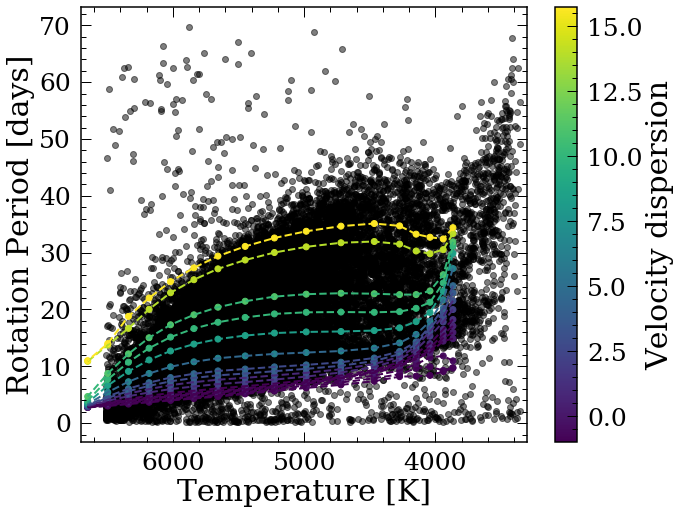

In [13]:
plt.figure(figsize=(10,8))
cm = plt.cm.get_cmap('viridis',10)
v_max,v_min=max(VD_single),min(VD_single)
plt.scatter(df['teff_calc'],df['Prot'],c='k',vmax=v_max,vmin=v_min,alpha=0.5)
for i in range(len(BV)):
    plt.scatter(Teff_model[:,i],Prot[:,i],c=VD_model[:,i],vmax=v_max,vmin=v_min)
    plt.plot(Teff_model[:,i],Prot[:,i],'--',c=cm(VD_single[i]/(v_max-v_min)))
    for j in range(len(Teff_model[:,i])):
        if np.isnan(Prot[j,i]) or np.isnan(Teff_model[j,i]) or np.isnan(VD_model[j,i]):
            continue 
        else:
            Prot_model_1d.append(Prot[j,i])
            Teff_model_1d.append(Teff_model[j,i])
            VD_model_1d.append(VD_model[j,i])
df=df.loc[df['teff_calc']>3300]
plt.xlim([3300,6700])
plt.gca().invert_xaxis()
plt.ylabel('Rotation Period [days]')
plt.xlabel('Temperature [K]')
cb=plt.colorbar()
cb.set_label('Velocity dispersion')

"""
np.save('Figures/Teff_single.npy',Teff_single)
np.save('Figures/Teff_model.npy',Teff_model)
np.save('Figures/Prot_model.npy',Prot)
np.save('Figures/VD_model.npy',VD_model)
np.save('Figures/VD_single.npy',VD_single)
df[['teff_calc','Prot']].to_pickle('Figures/modelTP.pkl')
"""

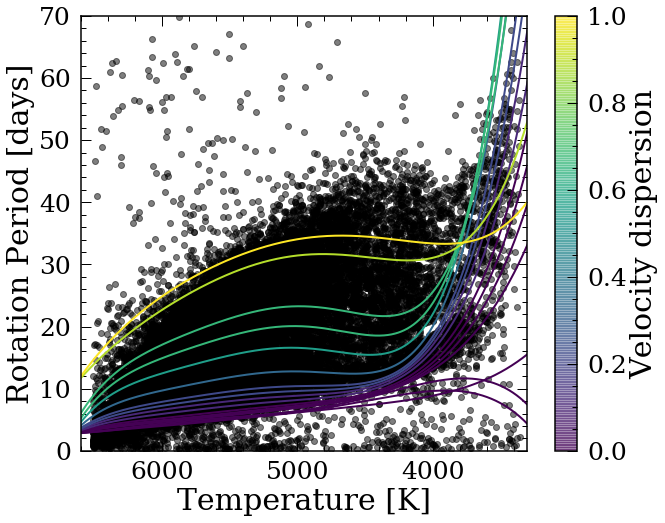

In [14]:
Model_df=pd.DataFrame(np.array((VD_single)).T,columns=['VD'])
Model_df=pd.concat([Model_df,pd.DataFrame(Prot.T,columns=['Prot'+str(i) for i in range(len(Prot))])],axis=1, sort=False)

Model_df_1d=pd.DataFrame(np.array((Teff_model_1d,Prot_model_1d,VD_model_1d)).T,columns=['Teff','Prot','VD'])

VDDic={'Prot'+str(i):Teff_single[i] for i in range(len(Prot))}
#print(VDDic)

p_model=[]
for i in range(len(Model_df)):
    fitModel = np.polyfit(Teff_single, Model_df.loc[i][['Prot'+str(i) for i in range(len(Prot))]].values, 5)
    p_model.append(np.poly1d(fitModel))

plt.figure(figsize=(10,8))
cm = plt.cm.get_cmap('viridis',10)
v_max,v_min=max(VD_single),min(VD_single)
plt.scatter(df['teff_calc'],df['Prot'],c='k',vmax=v_max,vmin=v_min,alpha=0.5)
for i in range(len(p_model)):
    plt.plot(range(3000,7000),p_model[i](range(3000,7000)),c=cm(VD_single[i]/(v_max-v_min)))
plt.xlim([3300,6600])
plt.ylim([0,70])
plt.gca().invert_xaxis()
plt.ylabel('Rotation Period [days]')
plt.xlabel('Temperature [K]')
cb=plt.colorbar()
cb.set_label('Velocity dispersion')




In [15]:
VD_NN=np.zeros(len(df))
for i in range(len(df)):
    update_progress(i/len(df))
    
    Newstar_teff=df.iloc[i].teff_calc
    Newstar_Prot=df.iloc[i].Prot
    
    Newstar_prots=np.zeros(len(VD_single))
    # get all the Prots in the model
    for j in range(len(VD_single)):
        Newstar_prots[j]=p_model[j](Newstar_teff)
    
    fitModel = np.polyfit(Newstar_prots,VD_single, 1)
    print(fitModel)
    VD_model_fit=np.poly1d(fitModel)
    
    VD_NN[i]=VD_model_fit(Newstar_Prot)
    
    
df['VD_model']=VD_NN

Progress: [####################] 100.0%
[ 0.71439853 -2.75185825]


In [16]:
VD_model

array([[-0.97731619, -0.74179696, -0.39565862,  0.16260764,  0.37953529,
         0.69824253,  1.21199167,  2.17674423,  3.06254848,  3.87486633,
         4.61894244,  6.49099198,  8.67567429, 10.09753437, 11.12664462,
        14.15677274, 15.74591018],
       [-0.97731619, -0.74179696, -0.39565862,  0.16260764,  0.37953529,
         0.69824253,  1.21199167,  2.17674423,  3.06254848,  3.87486633,
         4.61894244,  6.49099198,  8.67567429, 10.09753437, 11.12664462,
        14.15677274, 15.74591018],
       [-0.97731619, -0.74179696, -0.39565862,  0.16260764,  0.37953529,
         0.69824253,  1.21199167,  2.17674423,  3.06254848,  3.87486633,
         4.61894244,  6.49099198,  8.67567429, 10.09753437, 11.12664462,
        14.15677274, 15.74591018],
       [-0.97731619, -0.74179696, -0.39565862,  0.16260764,  0.37953529,
         0.69824253,  1.21199167,  2.17674423,  3.06254848,  3.87486633,
         4.61894244,  6.49099198,  8.67567429, 10.09753437, 11.12664462,
        14.15677274

In [19]:
df=df.dropna(subset=['teff_calc','Prot','Rvar'])

15.74591017973156 -0.9773161850798753


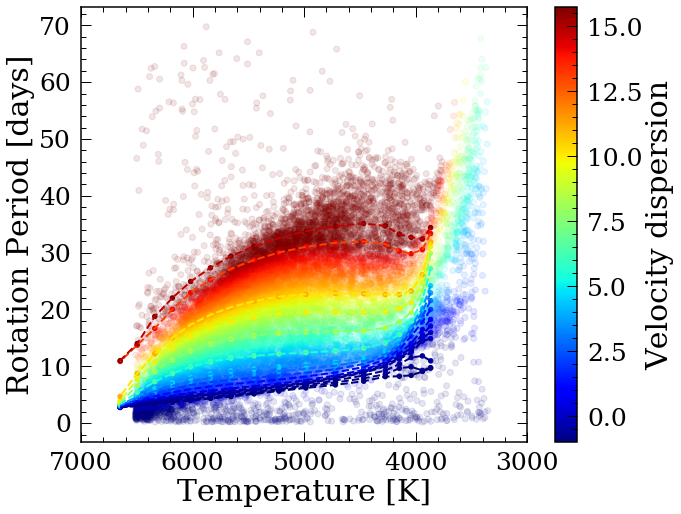

In [20]:
plt.figure(figsize=(10,8))
cm = plt.cm.get_cmap('jet')
v_max,v_min=max(VD_single),min(VD_single)
print(v_max,v_min)
plt.scatter(df['teff_calc'],df['Prot'],c=df['VD_model'],cmap=cm,vmax=v_max,vmin=v_min,alpha=0.1)
for i in range(len(BV)):
    plt.scatter(Teff_model[:,i],Prot[:,i],c=VD_model[:,i],vmax=v_max,vmin=v_min,cmap=cm,s=20)
    plt.plot(Teff_model[:,i],Prot[:,i],'--',c=cm(VD_single[i]/(v_max-v_min)))
plt.xlim([3000,7000])
plt.gca().invert_xaxis()
plt.ylabel('Rotation Period [days]')
plt.xlabel('Temperature [K]')
cb=plt.colorbar()
cb.set_label('Velocity dispersion')

df[['teff_calc','Prot','VD_model','Rvar']].to_pickle('vd_model.pkl')

# With mass

In [563]:
df_mass=pd.read_table('Ruth_McQuillan_Masses_Out.csv',delimiter=',')


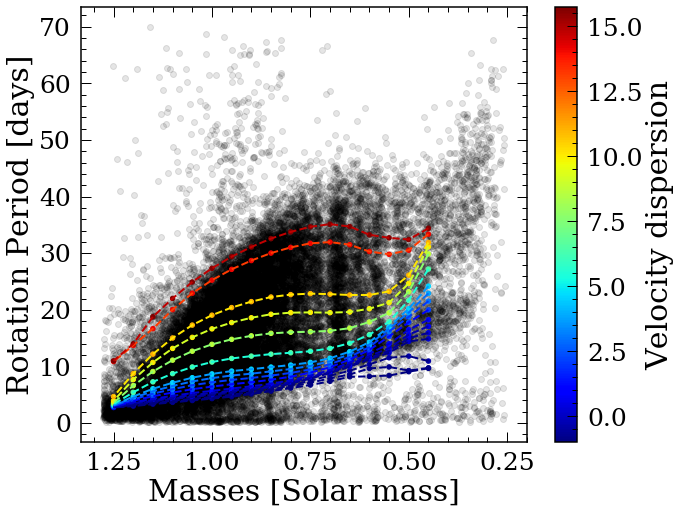

In [572]:
plt.figure(figsize=(10,8))
cm = plt.cm.get_cmap('jet')
v_max,v_min=max(VD_single),min(VD_single)

plt.scatter(df_mass['Mass'],df_mass['Prot'],c='k',cmap=cm,vmax=v_max,vmin=v_min,alpha=0.1)
for i in range(len(BV)):
    plt.scatter(Masses,Prot[:,i],c=VD_model[:,i],vmax=v_max,vmin=v_min,cmap=cm,s=20)
    plt.plot(Masses,Prot[:,i],'--',c=cm(VD_single[i]/(v_max-v_min)))
#plt.xlim([3000,7000])
plt.gca().invert_xaxis()
plt.ylabel('Rotation Period [days]')
plt.xlabel('Masses [Solar mass]')
cb=plt.colorbar()
cb.set_label('Velocity dispersion')

#df[['teff_calc','Prot','VD_model']].to_pickle('vd_model.pkl')


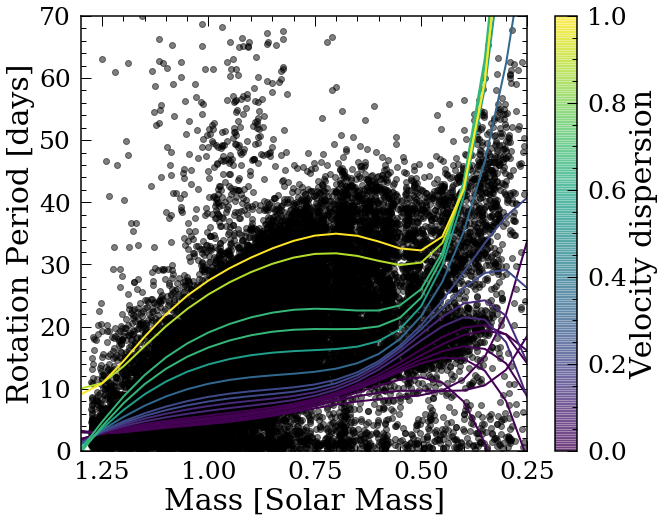

In [580]:
Model_df=pd.DataFrame(np.array((VD_single)).T,columns=['VD'])
Model_df=pd.concat([Model_df,pd.DataFrame(Prot.T,columns=['Prot'+str(i) for i in range(len(Prot))])],axis=1, sort=False)

VDDic={'Prot'+str(i):Masses[i] for i in range(len(Prot))}
#print(VDDic)

p_model=[]
for i in range(len(Model_df)):
    fitModel = np.polyfit(Masses, 
                Model_df.loc[i][['Prot'+str(i) for i in range(len(Prot))]].values, 6)
    p_model.append(np.poly1d(fitModel))

plt.figure(figsize=(10,8))
cm = plt.cm.get_cmap('viridis',10)
v_max,v_min=max(VD_single),min(VD_single)
plt.scatter(df_mass['Mass'],df_mass['Prot'],c='k',vmax=v_max,vmin=v_min,alpha=0.5)
for i in range(len(p_model)):
    plt.plot([i*0.05+0.25 for i in range(22)],p_model[i]([i*0.05+0.25 for i in range(22)]),
             c=cm(VD_single[i]/(v_max-v_min)))
plt.xlim([0.25,1.3])
plt.ylim([0,70])
plt.gca().invert_xaxis()
plt.ylabel('Rotation Period [days]')
plt.xlabel('Mass [Solar Mass]')
cb=plt.colorbar()
cb.set_label('Velocity dispersion')




In [581]:
VD_NN=np.zeros(len(df_mass))
for i in range(len(df_mass)):
    update_progress(i/len(df_mass))
    
    Newstar_teff=df_mass.iloc[i].Mass
    Newstar_Prot=df_mass.iloc[i].Prot
    
    Newstar_prots=np.zeros(len(VD_single))
    # get all the Prots in the model
    for j in range(len(VD_single)):
        Newstar_prots[j]=p_model[j](Newstar_teff)
    
    fitModel = np.polyfit(Newstar_prots,VD_single, 1)
    print(fitModel)
    VD_model_fit=np.poly1d(fitModel)
    
    VD_NN[i]=VD_model_fit(Newstar_Prot)
    
    
df_mass['VD_model']=VD_NN

Progress: [####################] 100.0%
[ 0.7242806  -2.76322502]


In [583]:
df_mass=df_mass.dropna(subset=['Mass','Prot'])

15.74591017973156 -0.9773161850798753


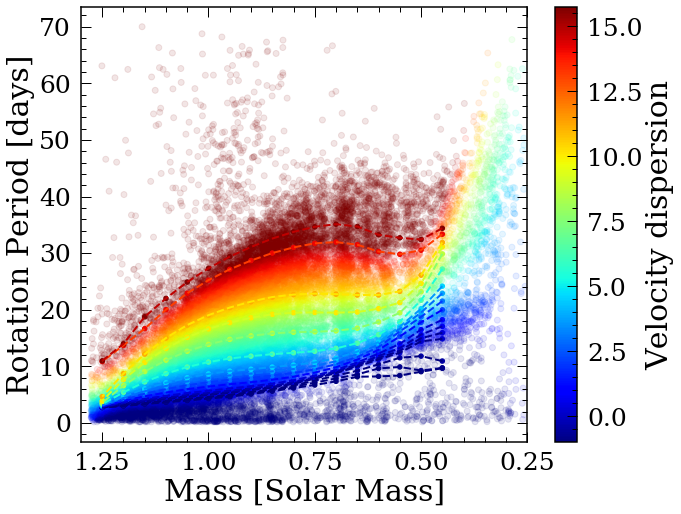

In [587]:
plt.figure(figsize=(10,8))
cm = plt.cm.get_cmap('jet')
v_max,v_min=max(VD_single),min(VD_single)
print(v_max,v_min)
plt.scatter(df_mass['Mass'],df_mass['Prot'],c=df_mass['VD_model'],cmap=cm,vmax=v_max,vmin=v_min,alpha=0.1)
for i in range(len(BV)):
    plt.scatter(Masses,Prot[:,i],c=VD_model[:,i],vmax=v_max,vmin=v_min,cmap=cm,s=20)
    plt.plot(Masses,Prot[:,i],'--',c=cm(VD_single[i]/(v_max-v_min)))
plt.xlim([0.25,1.3])
plt.gca().invert_xaxis()
plt.ylabel('Rotation Period [days]')
plt.xlabel('Mass [Solar Mass]')
cb=plt.colorbar()
cb.set_label('Velocity dispersion')

df_mass[['Mass','Prot','VD_model','Teff']].to_pickle('vd_model_mass.pkl')

In [588]:
from stardate.lhf import age_model

ModuleNotFoundError: No module named 'stardate.lhf'